<a href="https://colab.research.google.com/github/gr3g-z/TCC-PUCSP-CDIA/blob/main/Dataset-1/tcc_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Product

## Limpeza dos Dados

In [ ]:
#!pip install fbprophet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from prophet import Prophet
import pandas as pd
import re

In [ ]:
jan = pd.read_csv('/content/drive/MyDrive/sales_data/Sales_January_2019.csv')
fev = pd.read_csv('/content/drive/MyDrive/sales_data/Sales_February_2019.csv')
mar = pd.read_csv('/content/drive/MyDrive/sales_data/Sales_March_2019.csv')
abr = pd.read_csv('/content/drive/MyDrive/sales_data/Sales_April_2019.csv')
mai = pd.read_csv('/content/drive/MyDrive/sales_data/Sales_May_2019.csv')
jun = pd.read_csv('/content/drive/MyDrive/sales_data/Sales_June_2019.csv')
jul = pd.read_csv('/content/drive/MyDrive/sales_data/Sales_July_2019.csv')
ago = pd.read_csv('/content/drive/MyDrive/sales_data/Sales_August_2019.csv')
sep = pd.read_csv('/content/drive/MyDrive/sales_data/Sales_September_2019.csv')
out = pd.read_csv('/content/drive/MyDrive/sales_data/Sales_October_2019.csv')
nov = pd.read_csv('/content/drive/MyDrive/sales_data/Sales_November_2019.csv')
dez = pd.read_csv('/content/drive/MyDrive/sales_data/Sales_December_2019.csv')

In [ ]:
df = pd.concat([jan, fev, mar, abr, mai, jun, jul, ago, sep, out, nov, dez])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [ ]:
df['Product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine', nan, 'Product'], dtype=object)

In [ ]:
print(df.isna().sum())

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


In [ ]:
df = df.dropna(axis = 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [ ]:
df['Order Date'].head()

0    01/22/19 21:25
1    01/28/19 14:15
2    01/17/19 13:33
3    01/05/19 20:33
4    01/25/19 11:59
Name: Order Date, dtype: object

In [ ]:
# Converta a coluna 'Order Date' para datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

In [ ]:
df = df.dropna(subset=['Order Date'])

In [ ]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)

In [ ]:
df_cleaned = df.copy()

# Converta a coluna 'Order Date' para datetime
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

df_cleaned['Quantity Ordered'] = df_cleaned['Quantity Ordered'].astype(int)
df_cleaned['Price Each'] = df_cleaned['Price Each'].astype(float)

# Remova as linhas com valores não convertíveis
df_cleaned = df_cleaned.dropna(subset=['Order Date'])

In [ ]:
df_cleaned['Total Spent'] = df['Quantity Ordered'] * df['Price Each']

In [ ]:
df_cleaned

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Spent
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99
...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68
25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99


In [ ]:
df_cleaned.to_csv('SalesDF.csv', index=False)

In [ ]:
import pickle

with open("df_cleaned.pkl", "wb") as fp:   # Pickling
    pickle.dump(df_cleaned, fp)

## FB Prophet Forecasting

In [ ]:
with open("df_cleaned.pkl", "rb") as fp:   # Unpickling
    df_cleaned = pickle.load(fp)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 25116
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Total Spent       185950 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 11.3+ MB


In [ ]:
#df_forecast = df_cleaned.iloc[:, [3, 4]] # Renomeie as colunas se desejar
#df_forecast.columns = ['Price Each', 'Purchase Date']

In [ ]:
df_forecast = df_cleaned.drop(['Order ID','Product','Quantity Ordered','Price Each','Purchase Address'],axis =1)

In [ ]:
df_forecast = df_forecast.rename(columns={'Order Date': 'ds', 'Total Spent': 'y'})

In [ ]:
df_forecast

,ds,y
0,2019-01-22 21:25:00,700.00
1,2019-01-28 14:15:00,14.95
2,2019-01-17 13:33:00,23.98
3,2019-01-05 20:33:00,149.99
4,2019-01-25 11:59:00,11.99
...,...,...
25112,2019-12-11 20:58:00,14.95
25113,2019-12-01 12:01:00,7.68
25114,2019-12-09 06:43:00,400.00
25115,2019-12-03 10:39:00,11.99


In [ ]:
df_forecast.isnull().sum()

ds    0
y     0
dtype: int64

In [ ]:
m = Prophet()
m.fit(df_forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm30tli_r/gs3deoqc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm30tli_r/5s94u1to.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3801', 'data', 'file=/tmp/tmpm30tli_r/gs3deoqc.json', 'init=/tmp/tmpm30tli_r/5s94u1to.json', 'output', 'file=/tmp/tmpm30tli_r/prophet_modelwikqyafj/prophet_model-20240426000318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:03:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:03:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01 03:07:00,186.561060,-217.507721,616.228331,186.561060,186.561060,-0.313179,-0.313179,-0.313179,0.021075,0.021075,0.021075,-0.334254,-0.334254,-0.334254,0.0,0.0,0.0,186.247881
1,2019-01-01 03:40:00,186.560034,-248.563872,576.073317,186.560034,186.560034,-2.824084,-2.824084,-2.824084,-2.519222,-2.519222,-2.519222,-0.304862,-0.304862,-0.304862,0.0,0.0,0.0,183.735950
2,2019-01-01 04:56:00,186.557672,-258.196296,607.858324,186.557672,186.557672,-6.450186,-6.450186,-6.450186,-6.219087,-6.219087,-6.219087,-0.231099,-0.231099,-0.231099,0.0,0.0,0.0,180.107487
3,2019-01-01 05:53:00,186.555901,-224.317429,602.792823,186.555901,186.555901,-5.320941,-5.320941,-5.320941,-5.150617,-5.150617,-5.150617,-0.170324,-0.170324,-0.170324,0.0,0.0,0.0,181.234960
4,2019-01-01 06:03:00,186.555590,-260.453601,595.524325,186.555590,186.555590,-4.799464,-4.799464,-4.799464,-4.640273,-4.640273,-4.640273,-0.159191,-0.159191,-0.159191,0.0,0.0,0.0,181.756126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142420,2020-01-27 05:13:00,184.304719,-289.367691,626.429204,183.730664,184.942799,-6.648123,-6.648123,-6.648123,-6.267675,-6.267675,-6.267675,-0.380448,-0.380448,-0.380448,0.0,0.0,0.0,177.656596
142421,2020-01-28 05:13:00,184.317466,-256.594786,611.877552,183.712824,184.995983,-6.481131,-6.481131,-6.481131,-6.267675,-6.267675,-6.267675,-0.213455,-0.213455,-0.213455,0.0,0.0,0.0,177.836335
142422,2020-01-29 05:13:00,184.330212,-243.635686,612.858964,183.687260,185.049619,-4.393238,-4.393238,-4.393238,-6.267675,-6.267675,-6.267675,1.874438,1.874438,1.874438,0.0,0.0,0.0,179.936975
142423,2020-01-30 05:13:00,184.342959,-258.624773,592.375618,183.660872,185.103309,-5.624464,-5.624464,-5.624464,-6.267675,-6.267675,-6.267675,0.643211,0.643211,0.643211,0.0,0.0,0.0,178.718494


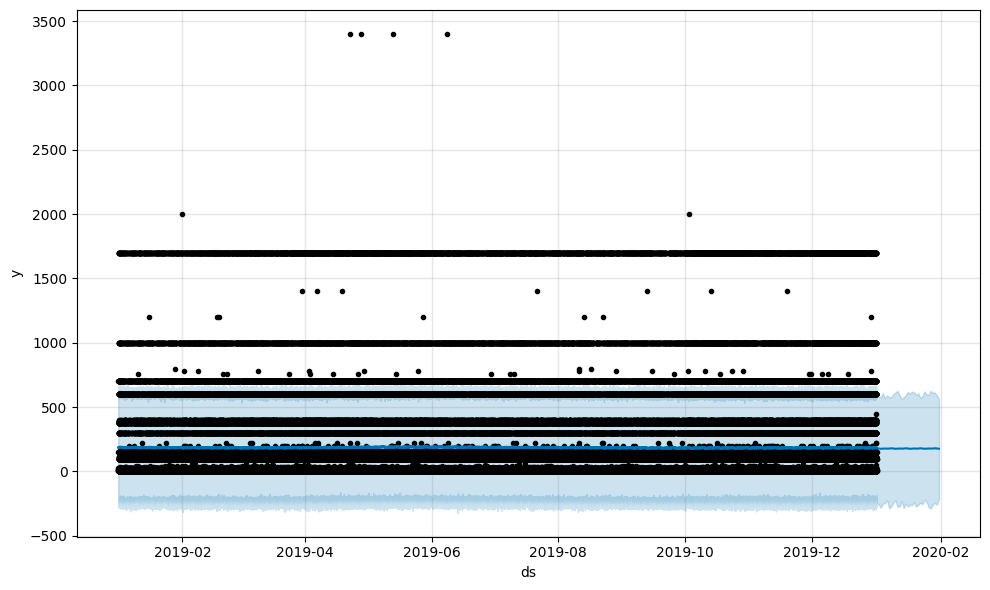

In [ ]:
m.plot(forecast);

-------------------------------------

In [ ]:
# Divisão para treino e teste
proporcao_treino = 0.8  # 80% de dados para treino
tamanho_treino = int(len(df_forecast) * proporcao_treino)

In [ ]:
tamanho_treino

148760

In [ ]:
# Separação dos dados para treino e teste
df_train = df_forecast.iloc[:tamanho_treino]  # Dados de treino
df_test = df_forecast.iloc[tamanho_treino:]   # Dados de teste

# Ajustes do modelo Prophet
model = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)
model.add_country_holidays(country_name='US')
model.fit(df_train)

# Dataframe com as datas futuras (180 dias)
future = model.make_future_dataframe(periods=30)

# Previsão
forecast = model.predict(future)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpm30tli_r/zwulhv6y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm30tli_r/62iv1fb5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2761', 'data', 'file=/tmp/tmpm30tli_r/zwulhv6y.json', 'init=/tmp/tmpm30tli_r/62iv1fb5.json', 'output', 'file=/tmp/tmpm30tli_r/prophet_model4z5yvjvv/prophet_model-20240426005659.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:56:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:57:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


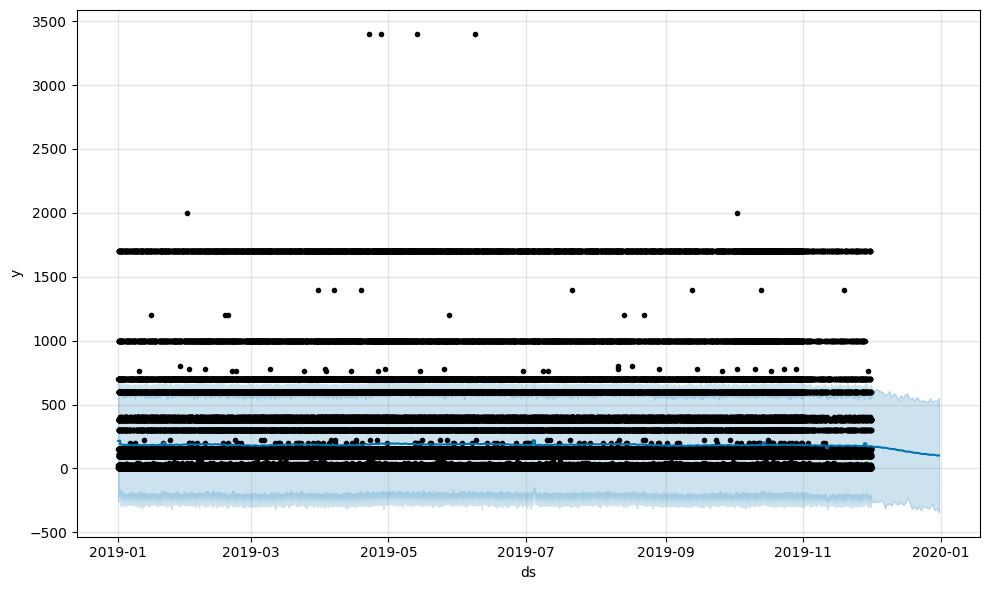

In [ ]:
m.plot(forecast)
m.plot_components(forecast)

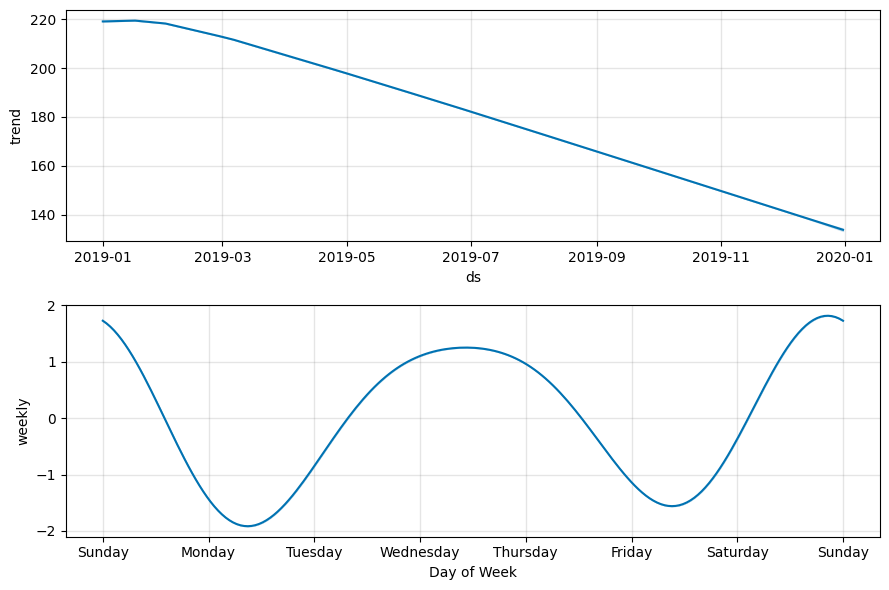

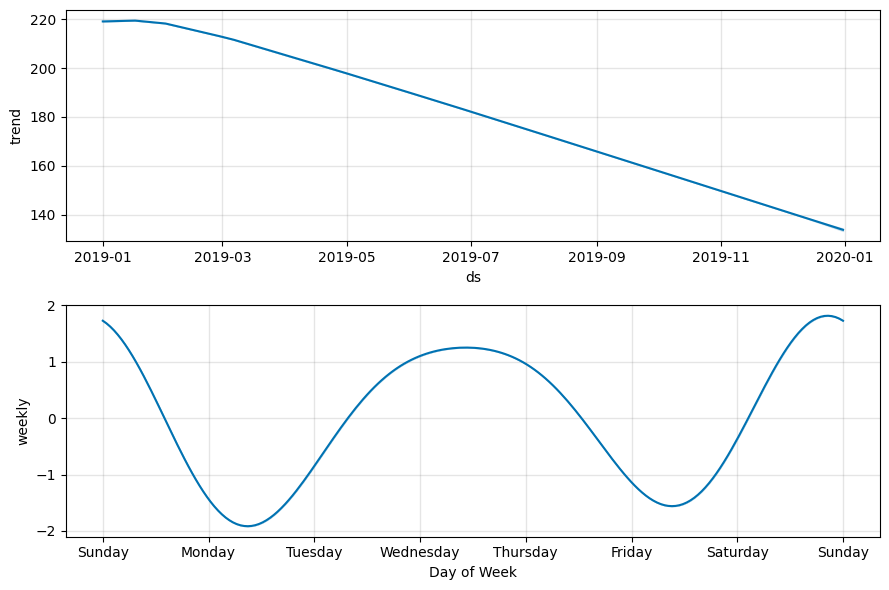

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

In [ ]:
# Avaliando as previsões e comparando com os dados de teste
test_results = forecast[['ds', 'yhat']].iloc[-len(df_test):]
comparison_df = df_test.set_index('ds').join(test_results.set_index('ds'))
# Verificando se há valores ausentes
print(comparison_df.isna().sum())
comparison_df = comparison_df.dropna()

y           0
yhat    35417
dtype: int64


In [ ]:
# Calculo do RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(comparison_df['y'], comparison_df['yhat']))
print(f'RMSE: {rmse}')

# Calculo do MAE (Mean Absolute Error)
mae = mean_absolute_error(comparison_df['y'], comparison_df['yhat'])
print(f'MAE: {mae}')

# Filtro de valores zero em y e as correspondentes previsões yhat
valid_indices = comparison_df['y'] != 0
y_filtered = comparison_df['y'][valid_indices]
yhat_filtered = comparison_df['yhat'][valid_indices]

# Calculo do MAPE filtrado
mape = mean_absolute_percentage_error(y_filtered, yhat_filtered) * 100

print(f'MAPE: {mape}%')
#Acurácia Baseada no MAPE
accuracy = 100 - mape
print(f'Acurácia do modelo: {accuracy:.2f}%')

RMSE: 320.1121758705978
MAE: 209.57135542365756
MAPE: 1461.2722061324425%
Acurácia do modelo: -1361.27%


### Divisao de Produtos

In [ ]:
df_cleaned['Product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine'], dtype=object)

In [ ]:
top_produtos = df_cleaned['Product'].value_counts()
df_top_produtos = pd.DataFrame(list(top_produtos.items()), columns=['Product', 'Count'])
df_top_produtos

,Product,Count
0,USB-C Charging Cable,21903
1,Lightning Charging Cable,21658
2,AAA Batteries (4-pack),20641
3,AA Batteries (4-pack),20577
4,Wired Headphones,18882
5,Apple Airpods Headphones,15549
6,Bose SoundSport Headphones,13325
7,27in FHD Monitor,7507
8,iPhone,6842
9,27in 4K Gaming Monitor,6230


In [ ]:
import plotly.express as px

fig = px.bar(df_top_produtos, x='Product', y='Count', color = 'Product', title="Quantidade de Vendas por Produto em 2019")
fig.show()

### Lightning Charging Cable

In [ ]:
produto_LightningCable = 'Lightning Charging Cable'
# Filtrar o DataFrame original para incluir apenas o produto específico
df_cabo = df_cleaned[df_cleaned['Product'] == produto_LightningCable].copy()
df_cabo

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Spent
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95
43,141276,Lightning Charging Cable,1,14.95,2019-01-21 22:23:00,"63 Cherry St, Los Angeles, CA 90001",14.95
45,141278,Lightning Charging Cable,1,14.95,2019-01-26 12:14:00,"100 Cherry St, New York City, NY 10001",14.95
46,141279,Lightning Charging Cable,1,14.95,2019-01-03 19:10:00,"938 14th St, Boston, MA 02215",14.95
48,141281,Lightning Charging Cable,1,14.95,2019-01-05 16:51:00,"274 2nd St, Atlanta, GA 30301",14.95
...,...,...,...,...,...,...,...
25077,319631,Lightning Charging Cable,1,14.95,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",14.95
25088,319642,Lightning Charging Cable,1,14.95,2019-12-22 19:23:00,"928 Chestnut St, Austin, TX 73301",14.95
25097,319651,Lightning Charging Cable,1,14.95,2019-12-14 22:36:00,"763 Washington St, Boston, MA 02215",14.95
25105,319659,Lightning Charging Cable,1,14.95,2019-12-13 07:25:00,"764 1st St, San Francisco, CA 94016",14.95


In [ ]:
# Converta a coluna 'Order Date' para o tipo de dado de data
df_cabo['Order Date'] = pd.to_datetime(df_cabo['Order Date'])

# Crie uma nova coluna 'Date' que contenha apenas a data, ignorando a hora
df_cabo['Date'] = df_cabo['Order Date'].dt.date

# Agora, agrupe os dados por 'Date' e some a 'Quantity Ordered' em cada grupo
vendas_por_dia_cabo = df_cabo.groupby('Date')['Quantity Ordered'].sum()

# Resetando o índice para que a data se torne uma coluna
df_cabo_Dia = vendas_por_dia_cabo.reset_index()

# Renomeando as colunas
df_cabo_Dia.columns = ['Data', 'Quantidade Vendida']

In [ ]:
df_cabo_Dia

,Data,Quantidade Vendida
0,2019-01-01,42
1,2019-01-02,36
2,2019-01-03,43
3,2019-01-04,36
4,2019-01-05,41
...,...,...
361,2019-12-28,101
362,2019-12-29,103
363,2019-12-30,90
364,2019-12-31,84


In [ ]:
df_forecast_cabo = df_cabo_Dia # Renomeie as colunas se desejar
df_forecast_cabo.df_forecast_cabo = ['Quantidade Vendida', 'Data']
df_forecast_cabo = df_cabo_Dia.rename(columns={'Data': 'ds', 'Quantidade Vendida': 'y'})

<ipython-input-51-27c4687f38ec>:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
# Divisão para treino e teste
proporcao_treino = 0.8  # 80% de dados para treino
tamanho_treino = int(len(df_forecast_cabo) * proporcao_treino)

# Separação dos dados para treino e teste
df_train = df_forecast_cabo.iloc[:tamanho_treino]  # Dados de treino
df_test = df_forecast_cabo.iloc[tamanho_treino:]   # Dados de teste

# Ajustes do modelo Prophet
model = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)
model.add_country_holidays(country_name='US')
model.fit(df_train)

# Dataframe com as datas futuras (180 dias)
future = model.make_future_dataframe(periods=30)

# Previsão
forecast = model.predict(future)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpm30tli_r/61kve5gb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm30tli_r/7nb9s7wo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18847', 'data', 'file=/tmp/tmpm30tli_r/61kve5gb.json', 'init=/tmp/tmpm30tli_r/7nb9s7wo.json', 'output', 'file=/tmp/tmpm30tli_r/prophet_modelp5i0n_vv/prophet_model-20240426013349.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:33:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:33:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


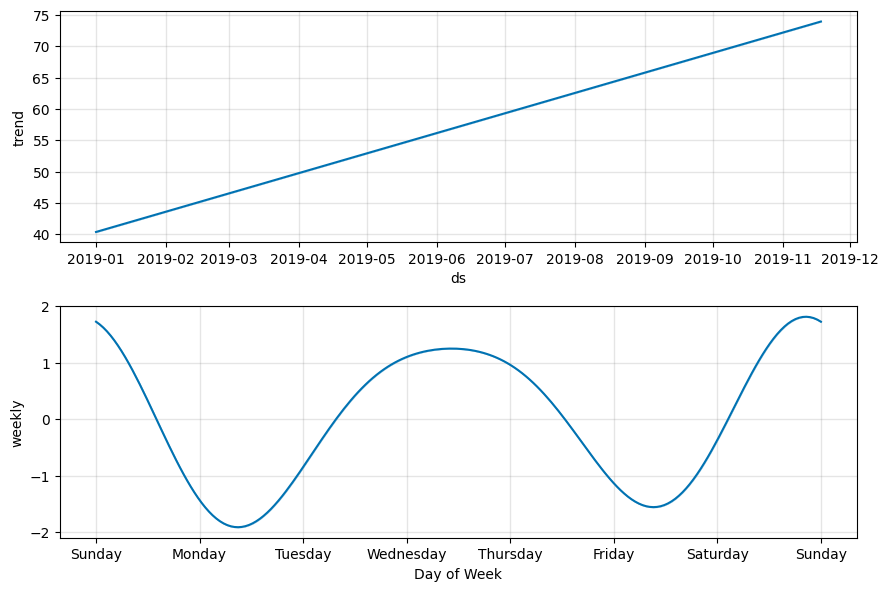

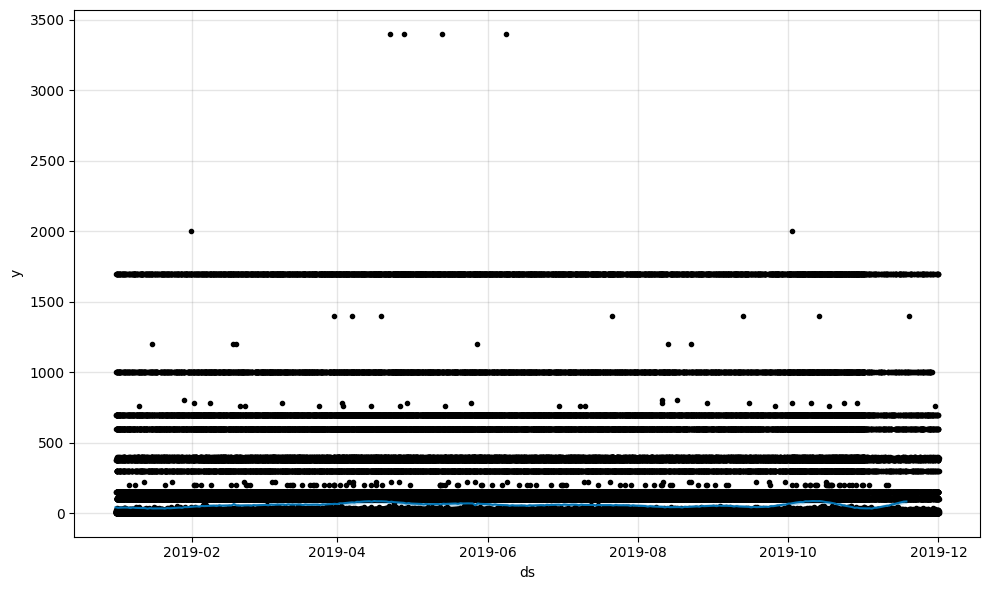

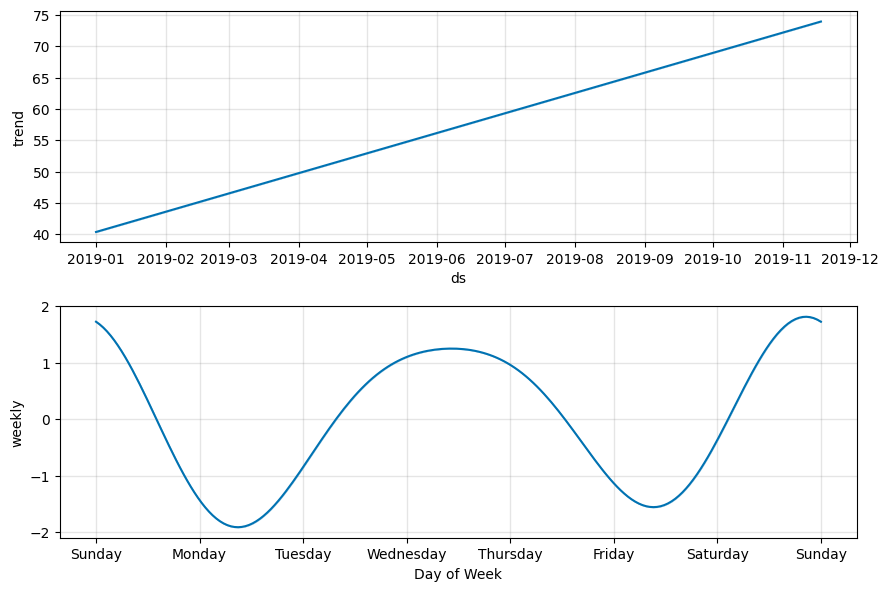

In [ ]:
m.plot(forecast);
m.plot_components(forecast)

In [ ]:

m = Prophet()
m.fit(df_forecast_cabo)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm30tli_r/8y_9hfmt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm30tli_r/y6vjk0gy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64893', 'data', 'file=/tmp/tmpm30tli_r/8y_9hfmt.json', 'init=/tmp/tmpm30tli_r/y6vjk0gy.json', 'output', 'file=/tmp/tmpm30tli_r/prophet_model8xrygek0/prophet_model-20240426013440.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:34:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:34:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
df_forecast_cabo

,ds,y
0,2019-01-01,42
1,2019-01-02,36
2,2019-01-03,43
3,2019-01-04,36
4,2019-01-05,41
...,...,...
361,2019-12-28,101
362,2019-12-29,103
363,2019-12-30,90
364,2019-12-31,84


In [ ]:
future_cabo = m.make_future_dataframe(periods=30)
forecast_cabo = m.predict(future_cabo)


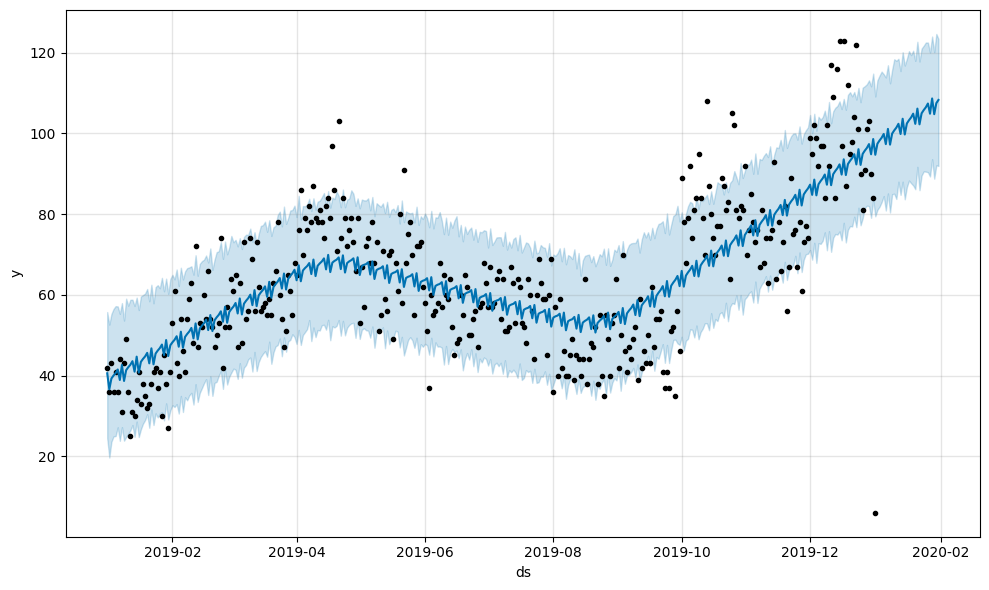

In [ ]:
m.plot(forecast_cabo);

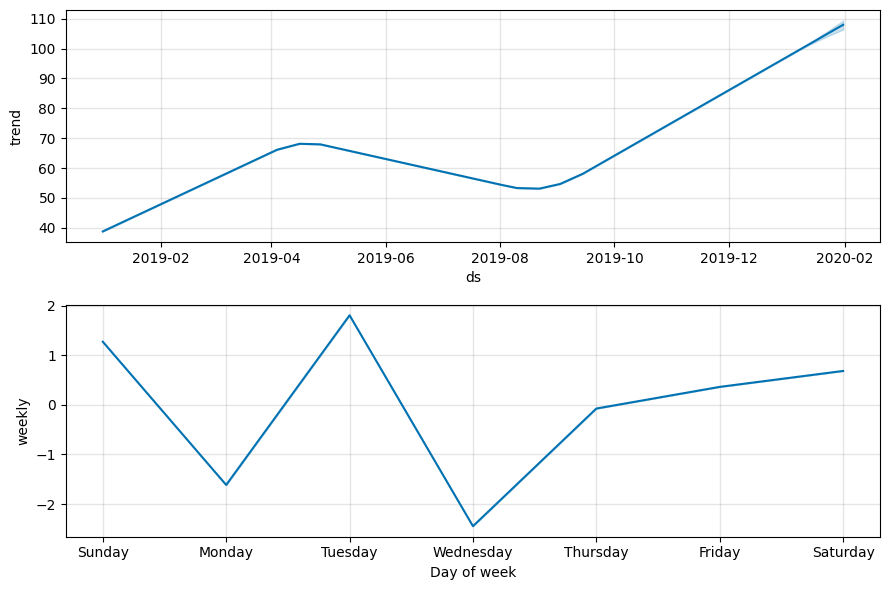

In [ ]:
m.plot_components(forecast_cabo)

### UBS-C Charging Cable

In [ ]:
produto_USBcCable = 'USB-C Charging Cable'
# Filtrar o DataFrame original para incluir apenas o produto específico
df_caboUsbC = df_cleaned[df_cleaned['Product'] == produto_USBcCable].copy()
df_caboUsbC

In [ ]:
# Converta a coluna 'Order Date' para o tipo de dado de data
df_caboUsbC['Order Date'] = pd.to_datetime(df_caboUsbC['Order Date'])

# Crie uma nova coluna 'Date' que contenha apenas a data, ignorando a hora
df_caboUsbC['Date'] = df_caboUsbC['Order Date'].dt.date

# Agora, agrupe os dados por 'Date' e some a 'Quantity Ordered' em cada grupo
vendas_por_dia_cabo_usbc = df_caboUsbC.groupby('Date')['Quantity Ordered'].sum()

# Resetando o índice para que a data se torne uma coluna
df_caboUsbC_Dia = vendas_por_dia_cabo_usbc.reset_index()

# Renomeando as colunas
df_caboUsbC_Dia.columns = ['Data', 'Quantidade Vendida']

In [ ]:
df_caboUsbC_Dia

In [ ]:
df_forecast_cabo_usbc = df_caboUsbC_Dia # Renomeie as colunas se desejar
df_forecast_cabo_usbc.df_forecast_cabo_usbc = ['Quantidade Vendida', 'Data']
df_forecast_cabo_usbc = df_forecast_cabo_usbc.rename(columns={'Data': 'ds', 'Quantidade Vendida': 'y'})
m = Prophet()
m.fit(df_forecast_cabo_usbc)

In [ ]:
future_cabo_usbc = m.make_future_dataframe(periods=30)
df_forecast_cabo_usbc = m.predict(future_cabo_usbc)

In [ ]:
m.plot(df_forecast_cabo_usbc);

In [ ]:
m.plot_components(df_forecast_cabo_usbc);

### Wired Headphones

In [ ]:
produto_foneFio ='Wired Headphones'
df_foneFio = df_cleaned[df_cleaned['Product'] == produto_foneFio].copy()
df_foneFio

In [ ]:
# Converta a coluna 'Order Date' para o tipo de dado de data
df_foneFio['Order Date'] = pd.to_datetime(df_foneFio['Order Date'])

# Crie uma nova coluna 'Date' que contenha apenas a data, ignorando a hora
df_foneFio['Date'] = df_foneFio['Order Date'].dt.date

# Agora, agrupe os dados por 'Date' e some a 'Quantity Ordered' em cada grupo
vendas_por_dia_fonefio = df_foneFio.groupby('Date')['Quantity Ordered'].sum()

# Resetando o índice para que a data se torne uma coluna
df_foneFio_Dia = vendas_por_dia_fonefio.reset_index()

# Renomeando as colunas
df_foneFio_Dia.columns = ['Data', 'Quantidade Vendida']

In [ ]:
df_foneFio_Dia

In [ ]:
forecast_fonefio = df_foneFio_Dia # Renomeie as colunas se desejar
forecast_fonefio.forecast_fonefio = ['Quantidade Vendida', 'Data']
forecast_fonefio = forecast_fonefio.rename(columns={'Data': 'ds', 'Quantidade Vendida': 'y'})
m = Prophet()
m.fit(forecast_fonefio)

In [ ]:
future_fonefio = m.make_future_dataframe(periods=30)
df_forecast_fonefio = m.predict(future_fonefio)
m.plot(df_forecast_fonefio);


In [ ]:
m.plot_components(df_forecast_fonefio);

### Apple Airpods Headphones

In [ ]:
produto_AirPods ='Apple Airpods Headphones'
df_airPods = df_cleaned[df_cleaned['Product'] == produto_AirPods].copy()
df_airPods

In [ ]:
# Converta a coluna 'Order Date' para o tipo de dado de data
df_airPods['Order Date'] = pd.to_datetime(df_airPods['Order Date'])

# Crie uma nova coluna 'Date' que contenha apenas a data, ignorando a hora
df_airPods['Date'] = df_airPods['Order Date'].dt.date

# Agora, agrupe os dados por 'Date' e some a 'Quantity Ordered' em cada grupo
vendas_por_dia_airpods = df_airPods.groupby('Date')['Quantity Ordered'].sum()

# Resetando o índice para que a data se torne uma coluna
df_airPods_Dia = vendas_por_dia_airpods.reset_index()

# Renomeando as colunas
df_airPods_Dia.columns = ['Data', 'Quantidade Vendida']

In [ ]:
df_airPods_Dia

In [ ]:
forecast_airpods = df_airPods_Dia # Renomeie as colunas se desejar
forecast_airpods.forecast_airpods = ['Quantidade Vendida', 'Data']
forecast_airpods = forecast_airpods.rename(columns={'Data': 'ds', 'Quantidade Vendida': 'y'})
m = Prophet()
m.fit(forecast_airpods)

In [ ]:
future_airpods = m.make_future_dataframe(periods=30)
df_forecast_airpods = m.predict(future_airpods)
m.plot(df_forecast_airpods);

In [ ]:
m.plot_components(df_forecast_airpods);

## K-Means - Dataset 1

* Como a ideia é usar o Kmeans para clusterizar o df e dividi-lo em partes pra ai sim fazer as analises, nada mais justo do que fazer isto neste dataset tb.

* pensei em usar verificar se os enderecos se repetem bastante, caso sim, transformar a string em inteiro para usar como feature junto ao total gasto + quatidade quatidade de pedido. e verificar se order id se repete tb, podemos usa-lo caso nao seja unico.

* em seguida podemos fazer a analise com prophet e sarima e comparar acuracias

* TO DO LIST

In [ ]:
df_cleaned

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_kms = df_cleaned

In [ ]:
# Inicializar o LabelEncoder
le = LabelEncoder()

# Ajustar o LabelEncoder aos valores únicos na coluna e transformá-los em números
df_kms['Product'] = le.fit_transform(df_kms['Product'])

In [ ]:
df_kms

In [ ]:
df_kms.hist(bins = 30, figsize=(15,15), color='r');

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_kms = df_kms.drop(['Purchase Address', 'Order Date','Order ID'], axis = 1)

In [ ]:
df_kms.head

In [ ]:
correlations = df_kms.corr()

f, ax = plt.subplots(figsize=(7,7)), sns.heatmap(correlations, annot = True);

In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(2,16): #20 WCCS's
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_kms)
    wcss.append(kmeans.inertia_)

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(wcss, 'bx-')
plt.xlabel('CLUSTERS')
plt.ylabel('WCCS VALUES')

In [ ]:
# TREINANDO MODELO
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_kms)

In [ ]:
kmeans.labels_

In [ ]:
len(kmeans.labels_)

In [ ]:
import numpy as np

In [ ]:
#QUANTIDADE POR GRUPO

np.unique(kmeans.labels_, return_counts=True)

In [ ]:
# Obtendo os centros dos clusters
df_kmeans = pd.DataFrame(data = kmeans.cluster_centers_, columns=df_kms.columns)

In [ ]:
df_kms['Cluster'] = kmeans.labels_

In [ ]:
# Agora, verifique se as colunas têm nomes únicos
if not df_kms.columns.is_unique:
    df_kms = df_kms.rename(columns = lambda x: f'{x}_cluster')

In [ ]:
len(kmeans.labels_)

In [ ]:
len(df_kms)

In [ ]:
# Certifique-se de que ambos os DataFrames têm o mesmo número de linhas
print(df_kms.shape)  # Verifique o número de linhas em df_kms
print(pd.DataFrame({'Cluster': kmeans.labels_}).shape)  # Verifique o número de linhas no DataFrame de labels

# Verifique se os rótulos são únicos
print(len(kmeans.labels_) == len(set(kmeans.labels_)))  # Deve imprimir True se os rótulos são únicos



In [ ]:
# Certifique-se de que ambos os DataFrames têm o mesmo número de linhas
print(df_kms.shape)  # Verifique o número de linhas em df_kms
print(pd.DataFrame({'Cluster': kmeans.labels_}).shape)  # Verifique o número de linhas no DataFrame de labels

# Adicione uma coluna 'Cluster' ao DataFrame df_kms
df_kms['Cluster'] = kmeans.labels_

# Tente concatenar os DataFrames novamente
dataset_final = df_kms


In [ ]:
dataset_final

In [ ]:
#CONFERINDO SE HÁ TODOS OS GRUPOS NO DATASET
set(dataset_final['Cluster'])

In [ ]:
#Separando Clusters por grupos em datasets para gerar histogramas
def hist_cluster(x):
    team = dataset_final[dataset_final['Cluster']== x]
    return team.hist(bins = 30, figsize=(10,10), color='r')

In [ ]:
hist_cluster(0);

In [ ]:
hist_cluster(1);

In [ ]:
hist_cluster(2);

In [ ]:
hist_cluster(3);

In [ ]:
import plotly as py
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

In [ ]:
dataset_final.head()

In [ ]:
X3 = dataset_final[['Product' , 'Quantity Ordered' ,'Price Each']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

In [ ]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Product' , 'Quantity Ordered' , 'Price Each']:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(dataset_final[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [ ]:
import plotly.graph_objs as go

dataset_final['Cluster'] =  labels3

trace1 = go.Scatter3d(
    x = dataset_final['Product'],
    y = dataset_final['Quantity Ordered'],
    z = dataset_final['Price Each'],
    mode='markers',
     marker=dict(
        color = dataset_final['Cluster'],
        size= 5,
        line=dict(
            color= dataset_final['Cluster'],
            width= 5
        ),
        opacity=0.8
     )
)

data = [trace1]

layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),  # Adicione a vírgula aqui
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Product'),
            yaxis = dict(title  = 'Quantity Ordered'),
            zaxis = dict(title  = 'Price Each')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
